In [ ]:
# Second Try 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("911.csv")

In [3]:
data.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1


In [5]:
def sepa(x):
    val = x.split(":")
    return val[0]

In [6]:
data['type'] = data['title'].apply(sepa)

In [9]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire


In [10]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'] , infer_datetime_format = True)

In [12]:
data['timeStamp'].head(2)

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
Name: timeStamp, dtype: datetime64[ns]

In [24]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type,year,month,day,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,DIABETIC EMERGENCY


In [13]:
import datetime as dt
data['year'] = data['timeStamp'].dt.year

In [14]:
data['month'] = data['timeStamp'].dt.month_name()

In [15]:
data['day'] = data['timeStamp'].dt.day_name()

In [16]:
def emergency_type_separator(x):
    x = x.split(':')
    x = x[1]
    return x

In [17]:
data['emergency_type'] = data['title'].apply(emergency_type_separator)

In [19]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,type,year,month,day,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,Thursday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,Thursday,DIABETIC EMERGENCY


In [21]:
def emergency_type_separator(x):
    x = x.split(':')
    x = x[1]
    return x

In [22]:
data['emergency_type'] = data['title'].apply(emergency_type_separator)

In [25]:
call_types = data['type'].value_counts()
call_types

EMS        208676
Traffic    151458
Fire        63775
Name: type, dtype: int64

In [27]:
calls_data = data.groupby(['month', 'type'])['type'].count()

In [28]:
calls_data_percentage = calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [29]:
calls_data_percentage.head()

month   type   
April   EMS        51.0
        Fire       15.0
        Traffic    34.0
August  EMS        50.0
        Fire       16.0
Name: type, dtype: float64

In [31]:
font = {
    'size': 'x-large',
    'weight': 'bold'
}


In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [33]:
calls_data_percentage = calls_data_percentage.reindex(month_order, level=0)

In [34]:
calls_data_percentage.head()

month     type   
January   EMS        49.0
          Fire       15.0
          Traffic    36.0
February  EMS        51.0
          Fire       15.0
Name: type, dtype: float64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0.5, 1.0, 'Calls/Month')

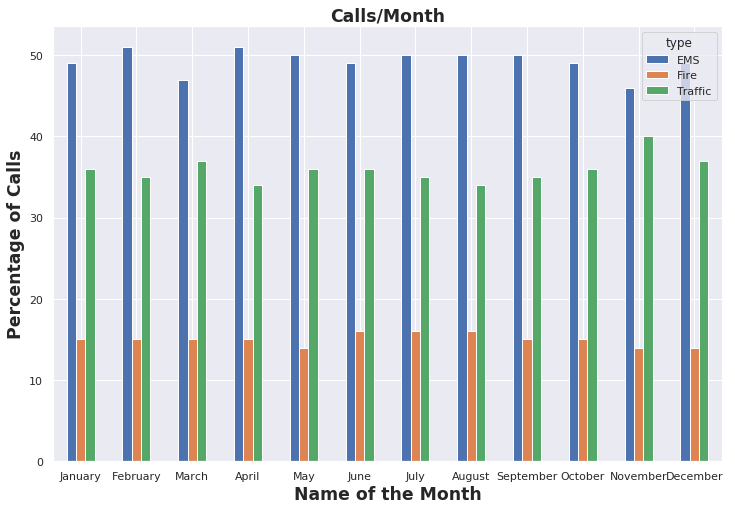

In [37]:
sns.set(rc={'figure.figsize':(12, 8)})
calls_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Month', fontdict=font)
